# <font color = 'orange'> Regularization

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

D:\Anconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

In [4]:
x_valid, x_train = (x_train_full[:5000]/x_train_full.max()), (x_train_full[5000:]/x_train_full.max())
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

x_test = x_test/x_train_full.max()

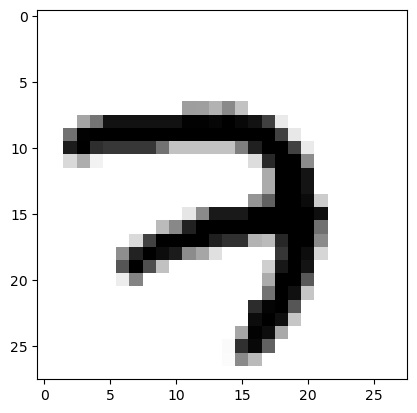

In [5]:
plt.imshow(x_train[0], cmap = 'binary')

<AxesSubplot:>

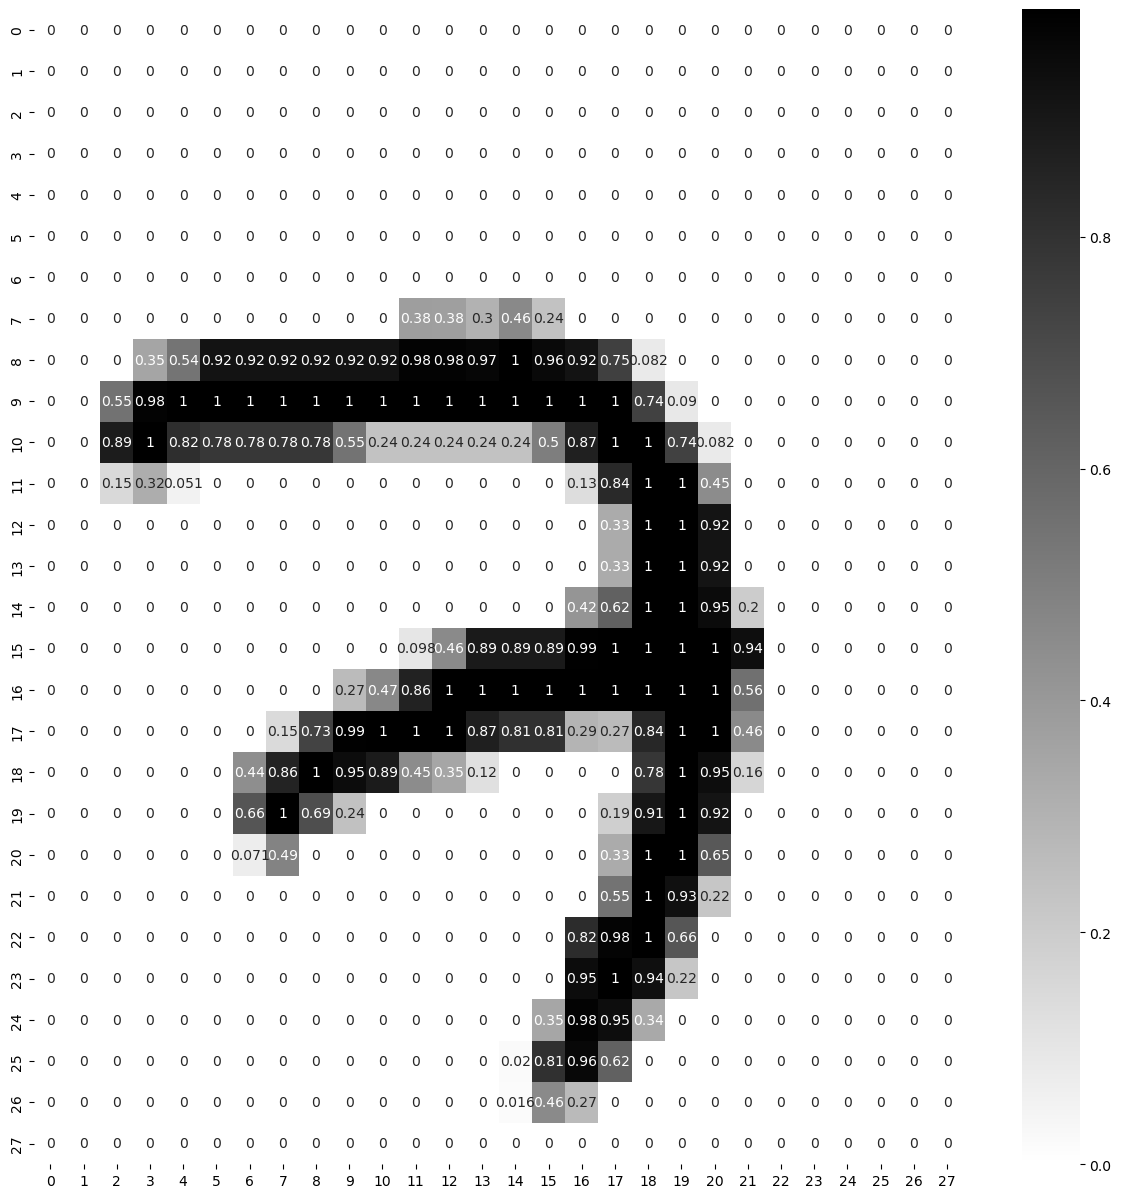

In [6]:
plt.figure(figsize = (15, 15))
sns.heatmap(x_train[0], annot = True, cmap = 'binary')

In [7]:
# model training

model = tf.keras.models.Sequential()

### <font color = 'blue'> Implementation of Dropout layer in the neural network

In [8]:
model.add(tf.keras.layers.Flatten(input_shape = [28, 28], name = 'inputLayer'))
model.add(tf.keras.layers.Dense(units = 64, activation = 'relu', name = 'hidden_layer_1'))
model.add(tf.keras.layers.Dropout(0.2)) # all the 64 neurons of previous layer have the probability 0.2 to get dropped  
model.add(tf.keras.layers.Dense(units = 32, activation = 'relu', name ='hidden_layer_2'))
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax', name = 'output_layer'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 hidden_layer_2 (Dense)      (None, 32)                2080      
                                                                 
 output_layer (Dense)        (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### <font color = 'blue'> Implementation of regularizer into the layers of the neural network

In [10]:
del model 

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape = [28, 28], name = 'inputLayer1'))
# 1e-4 is the largrang's parameter
model.add(tf.keras.layers.Dense(units = 64, activation = 'relu', kernel_regularizer = tf.keras.regularizers.L2(1e-4), name = 'hidden_layer_1')) # rigde regularization
model.add(tf.keras.layers.Dropout(0.2))  
model.add(tf.keras.layers.Dense(units = 32, activation = 'relu', kernel_regularizer = tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4), name ='hidden_layer_2')) # elastic net regularization
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax', name = 'output_layer'))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer1 (Flatten)       (None, 784)               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 64)                50240     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 hidden_layer_2 (Dense)      (None, 32)                2080      
                                                                 
 output_layer (Dense)        (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
Loss_function = 'sparse_categorical_crossentropy'
# stocastic gradient descent
Optimizer = 'SGD'
Metrics = ['accuracy']

model.compile(
    loss = Loss_function,
    optimizer = Optimizer,
    metrics = Metrics
)

In [13]:
# within 1 epoch there will be multiple iteration 
Epochs = 5 
Validation_set = (x_valid, y_valid)

history = model.fit(x_train, y_train, epochs = Epochs, validation_data = Validation_set, batch_size = 32)

Epoch 1/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.9429 - accuracy: 0.7219 - val_loss: 0.3891 - val_accuracy: 0.8980
Epoch 2/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4344 - accuracy: 0.8781 - val_loss: 0.2976 - val_accuracy: 0.9210
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3569 - accuracy: 0.9005 - val_loss: 0.2568 - val_accuracy: 0.9342
Epoch 4/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3110 - accuracy: 0.9147 - val_loss: 0.2279 - val_accuracy: 0.9432
Epoch 5/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2780 - accuracy: 0.9233 - val_loss: 0.2076 - val_accuracy: 0.9476
